In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Importación de API

En este desafio utilize la API de CDC que es publica y de libre acceso.

Se realiza la importación del archivo elegido con parametros modificados ya que el servidor impone por defecto 1000 filas de limite a la importación.

In [85]:
import pandas as pd
import requests

url = "https://chronicdata.cdc.gov/resource/4juz-x2tp.csv"
limit = 1000
offset = 0
filename = "datos.csv"

while True:
    # Agregar parámetros de paginación a la URL
    params = {"$limit": limit, "$offset": offset}
    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        # Escribir los datos de la respuesta en un archivo CSV
        with open(filename, "a") as f:
            f.write(response.text)
        
        # Si se han recuperado menos registros de lo que se solicitó, entonces se han recuperado todos los datos
        if len(response.text) < limit:
            break
            
        # Aumentar el offset para la próxima solicitud
        offset += limit
        
    else:
        print(f"Error al obtener datos de la API. Código de estado: {response.status_code}")
        break

# Cargar los datos desde el archivo CSV en un DataFrame de Pandas
df_r = pd.read_csv(filename)

# Eliminar el archivo CSV
import os
os.remove(filename)


Analisis de tipos de datos

In [86]:
df_r.dtypes

year                          object
locationabbr                  object
locationdesc                  object
topictype                     object
topicdesc                     object
measuredesc                   object
datasource                    object
response                      object
data_value_unit               object
data_value_type               object
data_value                    object
data_value_footnote_symbol    object
data_value_footnote           object
data_value_std_err            object
low_confidence_limit          object
high_confidence_limit         object
sample_size                   object
gender                        object
race                          object
age                           object
education                     object
geolocation                   object
topictypeid                   object
topicid                       object
measureid                     object
stratificationid1             object
stratificationid2             object
s

Muestra de datos

In [87]:
df = df_r
df

,year,locationabbr,locationdesc,topictype,topicdesc,measuredesc,datasource,response,data_value_unit,data_value_type,...,geolocation,topictypeid,topicid,measureid,stratificationid1,stratificationid2,stratificationid3,stratificationid4,submeasureid,displayorder
0,2017,AZ,Arizona,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Ever,%,Percentage,...,"(34.86597028, -111.763811277)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,1EDU,YTS11,11
1,2017,AZ,Arizona,Tobacco Use – Survey Data,Cessation (Youth),Percent of Current Smokers Who Want to Quit,YTS,NaN,%,Percentage,...,"(34.86597028, -111.763811277)",BEH,105BEH,170CES,3GEN,8AGE,6RAC,1EDU,YTS03,3
2,2017,AZ,Arizona,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Current,%,Percentage,...,"(34.86597028, -111.763811277)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS07,7
3,2017,AZ,Arizona,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Frequent,%,Percentage,...,"(34.86597028, -111.763811277)",BEH,151BEH,169USS,3GEN,8AGE,6RAC,1EDU,YTS12,12
4,2017,AZ,Arizona,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Ever,%,Percentage,...,"(34.86597028, -111.763811277)",BEH,151BEH,169USS,1GEN,8AGE,6RAC,1EDU,YTS11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10606,1999,TN,Tennessee,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Frequent,%,Percentage,...,"(35.68094058, -85.774490914)",BEH,106BEH,166SSA,3GEN,8AGE,6RAC,2EDU,YTS09,9
10607,1999,TN,Tennessee,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Ever,%,Percentage,...,"(35.68094058, -85.774490914)",BEH,151BEH,169USS,3GEN,8AGE,6RAC,1EDU,YTS11,11
10608,1999,TN,Tennessee,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Frequent,%,Percentage,...,"(35.68094058, -85.774490914)",BEH,151BEH,169USS,1GEN,8AGE,6RAC,1EDU,YTS12,12
10609,1999,TN,Tennessee,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Frequent,%,Percentage,...,"(35.68094058, -85.774490914)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS09,9


Forma del Dataset

In [88]:
df.shape

(10611, 31)

Recopilación de NA y Duplicados

In [89]:
print(df.isna().sum().sort_values())
print('Cant. de Duplicados ' ,df.duplicated().sum())

year                              0
stratificationid4                 0
stratificationid3                 0
stratificationid2                 0
stratificationid1                 0
measureid                         0
topicid                           0
topictypeid                       0
education                         0
age                               0
race                              0
gender                            0
submeasureid                      0
displayorder                      0
locationabbr                      0
locationdesc                      0
topictype                         0
topicdesc                         0
data_value_type                   0
data_value_unit                   0
measuredesc                       0
datasource                        0
geolocation                       4
low_confidence_limit            516
high_confidence_limit           519
data_value                      519
sample_size                     519
data_value_std_err          

Análisis Grafico de NA

In [90]:
pip install missingno


Note: you may need to restart the kernel to use updated packages.


<AxesSubplot: >

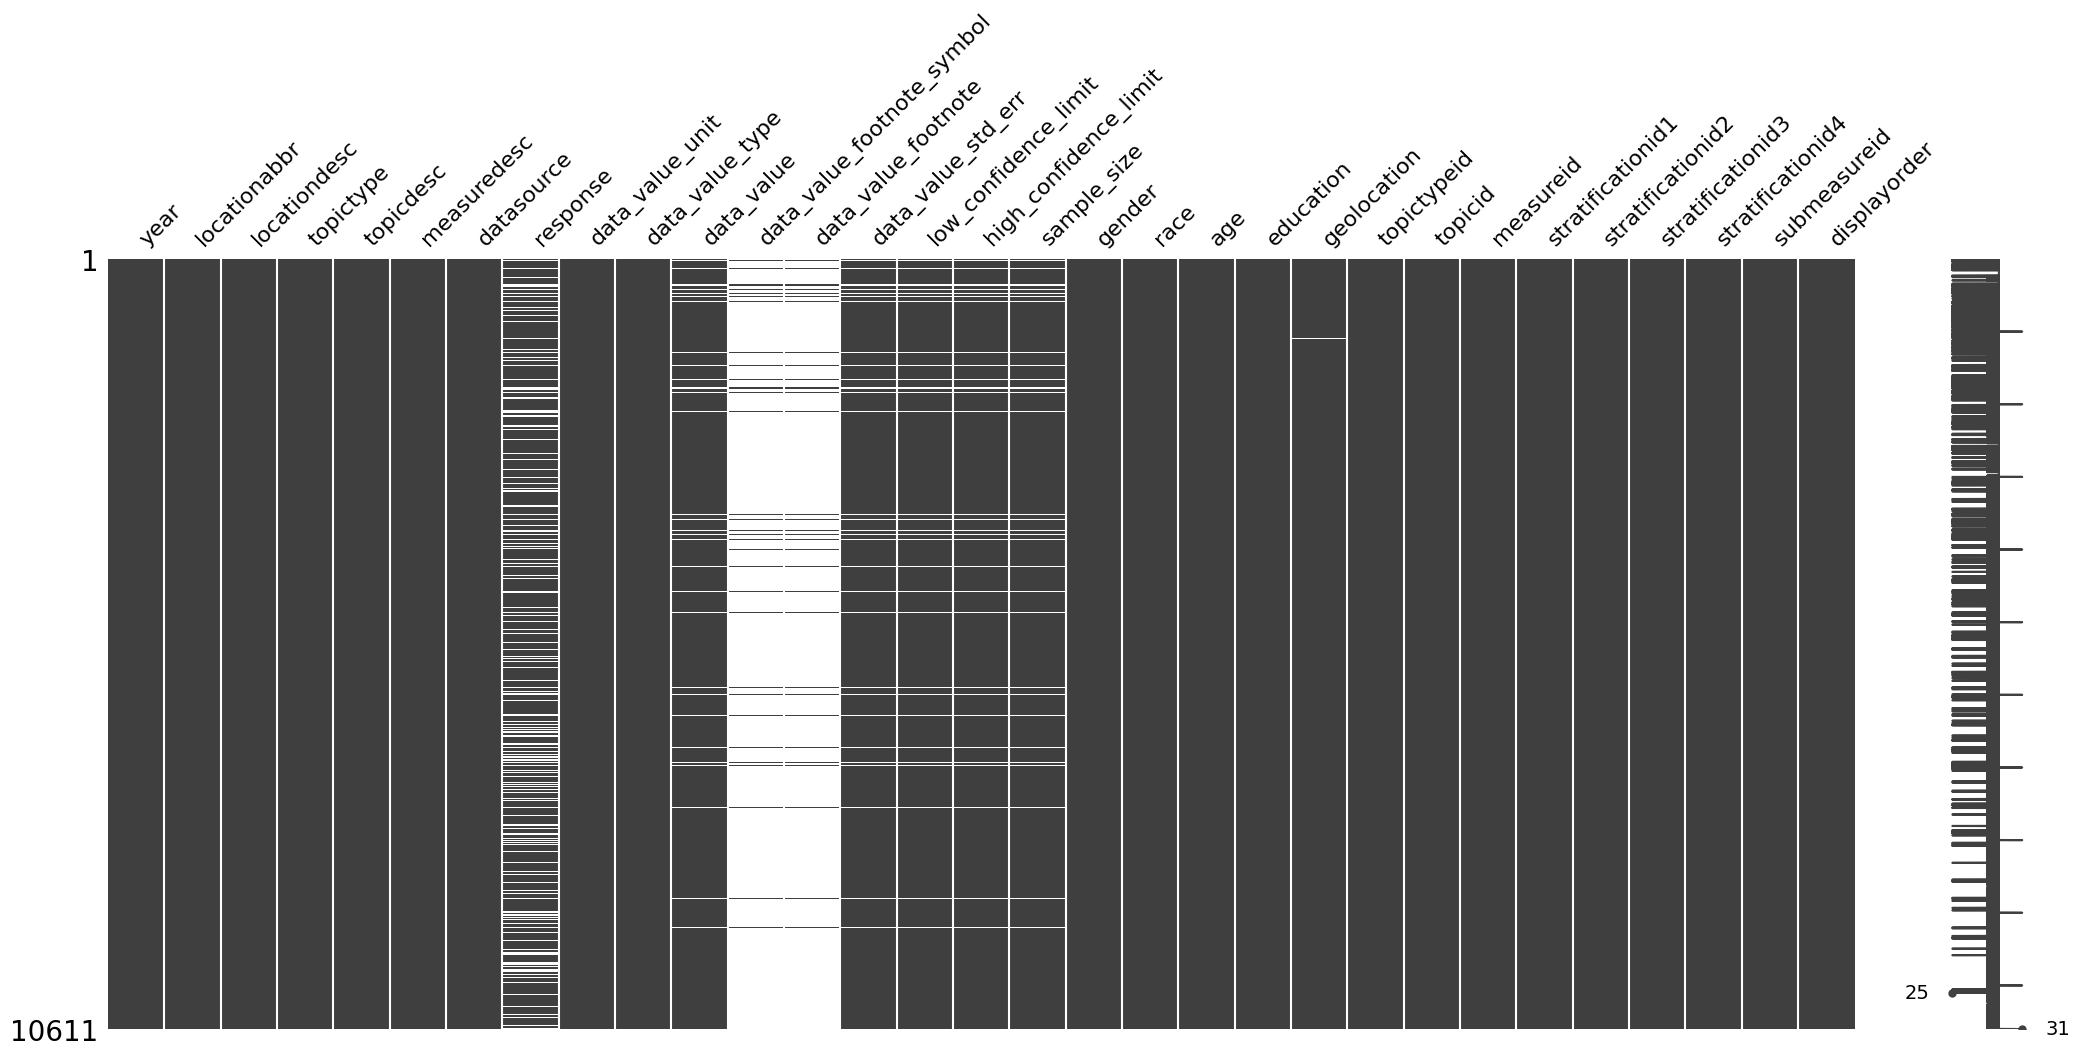

In [91]:
import missingno as msno
msno.matrix(df)